# **23-AI-30**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# **Q1: Outlier Detection (1 Mark)**
- Identify and remove outliers in the 'BloodPressure' column using any method of choice.
- Provide a boxplot before and after removing outliers.


In [ ]:
pat_data = pd.read_csv('patient_data.csv')
pat_data

,PatientID,Gender,Age,CholesterolLevel,BloodPressure,Region,RiskCategory
0,1,Male,37,193.4,129.4,East,High
1,2,Female,45,210.7,107.1,West,Low
2,3,Male,63,244.3,103.9,West,Low
3,4,Male,53,184.5,127.2,West,High
4,5,Male,29,175.7,116.6,South,High
...,...,...,...,...,...,...,...
95,96,Female,58,224.8,126.9,East,High
96,97,Female,68,200.4,123.0,North,Medium
97,98,Female,71,243.6,111.0,West,Low
98,99,Female,51,192.1,121.0,West,High


# **Boxplot Before Removing Outliers**

<Axes: ylabel='BloodPressure'>

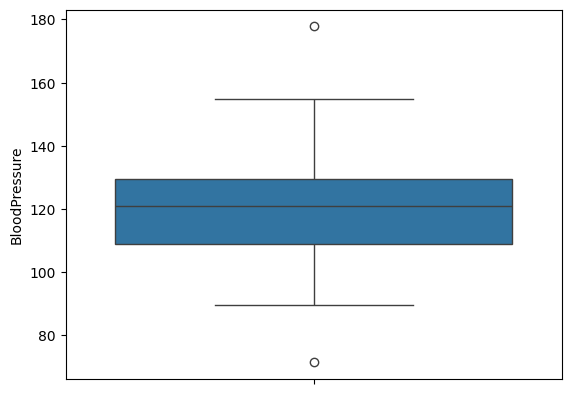

In [ ]:
sns.boxplot(pat_data['BloodPressure'])

# **Removing Outliers using Z-Score.**

In [ ]:
threshold = 3  # Always 3 because outliers is always outside the 3 std.

mean = np.mean(pat_data['BloodPressure'])
std = np.std(pat_data['BloodPressure'])

for index, i in enumerate(pat_data['BloodPressure']):
  z_score = (i - mean) / std
  if np.abs(z_score) > threshold:
    pat_data.drop([index], inplace=True)

pat_data

,PatientID,Gender,Age,CholesterolLevel,BloodPressure,Region,RiskCategory
0,1,Male,37,193.4,129.4,East,High
1,2,Female,45,210.7,107.1,West,Low
2,3,Male,63,244.3,103.9,West,Low
3,4,Male,53,184.5,127.2,West,High
4,5,Male,29,175.7,116.6,South,High
...,...,...,...,...,...,...,...
95,96,Female,58,224.8,126.9,East,High
96,97,Female,68,200.4,123.0,North,Medium
97,98,Female,71,243.6,111.0,West,Low
98,99,Female,51,192.1,121.0,West,High


# **Boxplot After Removing Outliers**

<Axes: ylabel='BloodPressure'>

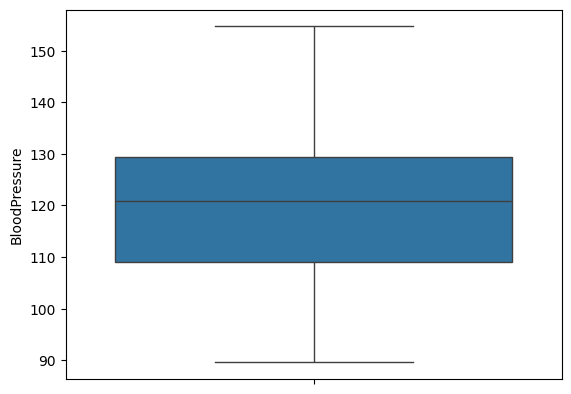

In [ ]:
sns.boxplot(pat_data['BloodPressure'])

# **Q2: Hypothesis Testing (2 Marks)**

**Perform the following:**
 - Is the mean 'CholesterolLevel' significantly different from 195 mg/dL having a sample
size of 20?
 - Is there a relationship between 'Gender' and 'RiskCategory'?

**For both tests, include:**
- Null and alternative hypotheses
- Test statistics and p-values
- Your interpretation (reject/fail to reject H₀)


# **Is the mean 'CholesterolLevel' significantly different from 195 mg/dL having a sample size of 20?**

# **Null and Alternative Hypotheses**

**Null Hypothesis (H0):** Mean 'CholesterolLevel' is not significantly different from 195 mg/dL.

**Alternative Hypothesis (H1):** Mean 'CholesterolLevel' significantly different from 195 mg/dL.

In [ ]:
import scipy.stats as stats

In [ ]:
cholesterol_level = pat_data['CholesterolLevel']
cholesterol_level

,CholesterolLevel
0,193.4
1,210.7
2,244.3
3,184.5
4,175.7
...,...
95,224.8
96,200.4
97,243.6
98,192.1


In [ ]:
len(pat_data['CholesterolLevel']) # This is n where n is the number of sample for t test.

98

In [ ]:
mean_cholesterol_level = np.mean(pat_data['CholesterolLevel'])
mean_cholesterol_level  # This is Actual Mean

np.float64(201.48061224489794)

In [ ]:
sample_size = 20
sample_choles = np.random.choice(pat_data['CholesterolLevel'], sample_size)
sample_choles

array([215.7, 206.8, 256.6, 170.3, 208.9, 187.4, 224.8, 170.3, 219.7,
       205.5, 208.8, 242.1, 170.8, 256. , 209. , 265.7, 256.6, 273.9,
       210.4, 224.8])

# **Test Statistics and P-Values**

In [ ]:
t_test, p_value = stats.ttest_1samp(sample_choles, 195) # 195 is Expected Mean

In [ ]:
t_test

np.float64(3.4431754797308964)

In [ ]:
p_value

np.float64(0.002724728002680771)

# **Finding Null or Alternative Hypothesis using P-Value**

In [ ]:
if p_value > 0.05:
  print("We are accepting Null Hypothesis")

else:
  print("We are rejecting Null Hypothesis")


We are rejecting Null Hypothesis


In [ ]:
stats.t.ppf(q = 0.025, df = 19) # q is quantile and df is degree of freedom which is n - 1: 20 - 1 = 19

np.float64(-2.0930240544082634)

In [ ]:
stats.t.ppf(q = 0.975, df = 19) # q is quantile and df is degree of freedom which is n - 1: 20 - 1 = 19

np.float64(2.093024054408263)

# **Finding Null or Alternative Hypothesis using T-Test**

In [ ]:
if t_test > -2.093 and t_test < 2.093:
  print("We are accepting Null Hypothesis")

else:
  print("We are rejecting Null Hypothesis")

We are rejecting Null Hypothesis


# **My Interpretation**

We are rejecting null hypothesis because t_test is evaluated to 3.44 which is outside our boundary value -2.093 and 2.093.
Hence, mean of CholestoralLevel is significantly different from 195 mg/dL having a sample size of 20.

**----------------------------------------------------------------------------------------------------------------------------------**

# **Is there a relationship between 'Gender' and 'RiskCategory'?**

# **Null and Alternative Hypotheses**

**Null Hypothesis (H0):** There is a relationship.

**Alternative Hypothesis (H1):** There is no relationship.

In [ ]:
my_data = pd.crosstab(pat_data['Gender'], pat_data['RiskCategory'])
my_data

RiskCategory,High,Low,Medium
Gender,,,
Female,12,19,24
Male,12,18,13


In [ ]:
my_observed_values = my_data.values
my_observed_values

array([[12, 19, 24],
       [12, 18, 13]])

# **Test Statistics and P-Values**

In [ ]:
my_chi_square, p_value, degree_of_freedom, expected_values = stats.chi2_contingency(my_observed_values)

In [ ]:
my_chi_square

np.float64(1.8557339580595396)

In [ ]:
p_value

np.float64(0.3953961999142082)

In [ ]:
degree_of_freedom

2

In [ ]:
expected_values

array([[13.46938776, 20.76530612, 20.76530612],
       [10.53061224, 16.23469388, 16.23469388]])

# **Finding Null or Alternative Hypothesis using P-Value**

In [ ]:
if p_value > 0.05:
  print("We are accepting Null Hypothesis")

else:
  print("We are rejecting Null Hypothesis")

We are accepting Null Hypothesis


In [ ]:
my_alpha = 0.05
my_critical_values = stats.chi2.ppf(q = 1 - my_alpha, df = degree_of_freedom)
my_critical_values

np.float64(5.991464547107979)

# **Finding Null or Alternative Hypothesis using Chi-Square**

In [ ]:
if my_chi_square < my_critical_values:
  print("We are accepting Null Hypothesis")

else:
  print("We are rejecting Null Hypothesis")

We are accepting Null Hypothesis


# **My Interpretation**

We are accepting Null Hypothesis because our my_chi_square is evaluated to 1.86 and less than critical value which is 5.99.
Hence, There is a relationship.

# **Q3: Modeling with First Order ODE (2 Marks)**
Model the concentration of a drug in a patient’s bloodstream using the equation:
 dC/dt = k(D - C)
Where:
- k = 0.05, D = 120, and initial condition C(0) = 0
- Simulate from t = 0 to t = 100
- Plot the result and explain the physical meaning of the concentration curve over time.

In [ ]:
from scipy.integrate import odeint

In [ ]:
def myBloodstream(t, C):
  k = 0.05
  D = 120
  dCdt = k * (D - C)
  return dCdt

In [ ]:
C = 0
t = np.linspace(0, 100)
output = odeint(myBloodstream, y0=C, t=t, tfirst=True)

Text(0, 0.5, 'Output (C(t))')

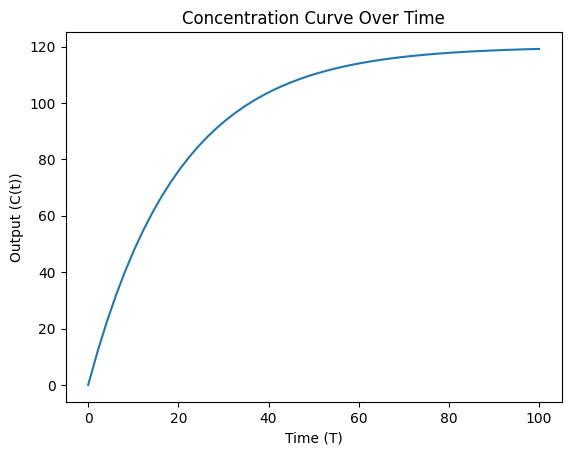

In [ ]:
plt.plot(t, output)
plt.title("Concentration Curve Over Time")
plt.xlabel("Time (T)")
plt.ylabel("Output (C(t))")

**Physical Meaning:** It concludes that at time from approximately 0 to 40 the concentration of drug in a patient's bloodstream is much higher but after 40 the concentration of drug is too low. It means the concentration of drug is increasing with increasing rate from 0 to 40 then increasing with decreasing rate.